In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

# Load dataset
df = pd.read_csv("/content/sentimentdataset.csv")

# Drop unnecessary columns
df = df[["Text", "Sentiment"]]
df.dropna(inplace=True)

# Strip whitespaces
df['Text'] = df['Text'].str.strip()
df['Sentiment'] = df['Sentiment'].str.strip()

# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Sentiment'])

# Tokenize text
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df['Text'])
sequences = tokenizer.texts_to_sequences(df['Text'])
padded = pad_sequences(sequences, maxlen=100, padding='post', truncating='post')

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(padded, df['label'], test_size=0.2, random_state=42)

In [3]:
# Encode labels
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['Sentiment'])

# Check unique labels and adjust model output if necessary
num_classes = df['label'].nunique()
print(f"Number of unique labels: {num_classes}")

# Instantiate the model
model = Sequential() # Create a Keras Sequential model

# ... (Rest of your code to add layers) ...

# Modify the model's final Dense layer:
model.add(Dense(num_classes, activation='softmax'))  # Use num_classes instead of 3

# ... (Rest of your code) ...

Number of unique labels: 191


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


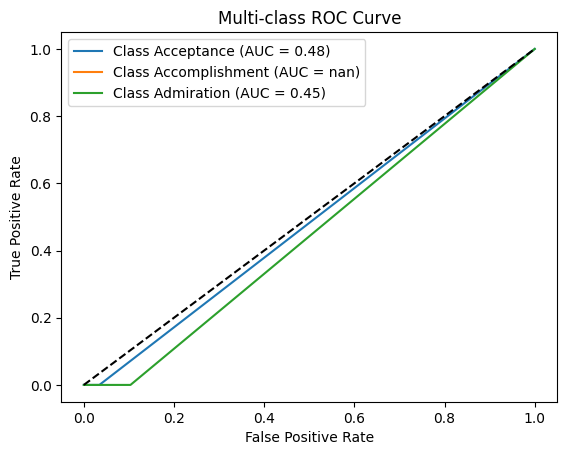

In [5]:
from sklearn.preprocessing import label_binarize

# Assuming you have your trained model stored in the 'model' variable
# Generate predictions on the test data
y_pred_probs = model.predict(X_test)

# Binarize labels
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# ROC Curve
fpr = {}
tpr = {}
roc_auc = {}

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_probs[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label=f"Class {label_encoder.classes_[i]} (AUC = {roc_auc[i]:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Multi-class ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1033: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(


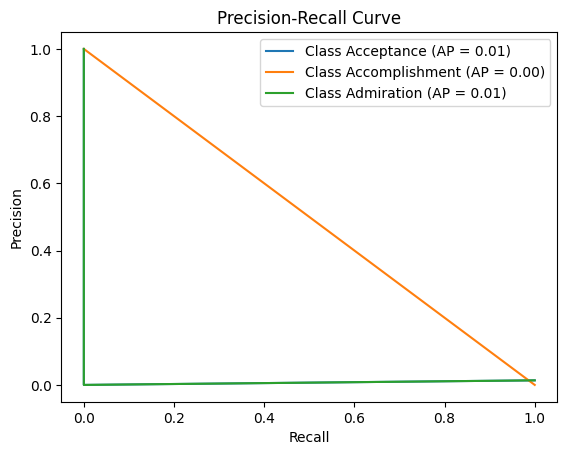

In [6]:
# Precision-Recall Curve
precision = {}
recall = {}
average_precision = {}

for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_probs[:, i])
    average_precision[i] = average_precision_score(y_test_bin[:, i], y_pred_probs[:, i])

plt.figure()
for i in range(n_classes):
    plt.plot(recall[i], precision[i], label=f"Class {label_encoder.classes_[i]} (AP = {average_precision[i]:.2f})")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [8]:
# Classification Report
# Assuming you have your trained model stored in the 'model' variable
# Generate predictions on the test data
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1) # Get predicted labels


# Get unique labels in y_test and y_pred
unique_labels = np.unique(np.concatenate((y_test, y_pred)))

# Use unique labels as target names
# Convert to strings for compatibility
target_names = [str(label) for label in unique_labels]

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=target_names))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Classification Report:

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       2.0
           5       0.00      0.00      0.00       0.0
           6       0.00      0.00      0.00       1.0
           8       0.00      0.00      0.00       1.0
          10       0.00      0.00      0.00       1.0
          11       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       3.0
          17       0.00      0.00      0.00       2.0
          18       0.00      0.00      0.00       1.0
          19       0.00      0.00      0.00       3.0
          20       0.00      0.00      0.00       1.0
          21       0.00      0.00      0.00       1.0
          22       0.00      0.00      0.00       1.0
          24       0.00      0.00      0.00       1.0
          26       0.00      0.00      0.00       1.0
          27       

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

In [9]:
from scipy.stats import ttest_ind

# Assuming 'Text' column might be used to identify sources
# You might need to adjust this based on the actual content of your 'Text' column
# For example, if 'Text' contains source information like "4-traders: ..."
group1 = df[df['Text'].str.contains('4-traders')]['label']
group2 = df[df['Text'].str.contains('The Chronicle')]['label']

# If you have another column that indicates source, replace 'Text' with that column name

t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch’s T-test
print("T-test Statistic:", t_stat)
print("P-value:", p_value)

T-test Statistic: nan
P-value: nan


<ipython-input-9-9b3b4e08d4ef>:11: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch’s T-test


In [10]:
import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest

# Example: Z-test on same groups as above
# Check if groups are empty before proceeding with ztest
if len(group1) > 0 and len(group2) > 0:
    z_stat, p_val = ztest(group1, group2, value=0)
    print("Z-test Statistic:", z_stat)
    print("P-value:", p_val)
else:
    print("One or both groups are empty, Z-test cannot be performed.")

One or both groups are empty, Z-test cannot be performed.


In [11]:
alpha = 0.05  # 5% significance level

# Assume t-test result is reused here
if p_value < alpha:
    print("Reject the null hypothesis (Type I Error possible)")
else:
    print("Fail to reject the null hypothesis (No Type I Error)")

print("Type I Error Likelihood:", alpha)

Fail to reject the null hypothesis (No Type I Error)
Type I Error Likelihood: 0.05


In [12]:
from scipy.stats import f_oneway

# Example: Compare sentiment label scores across top 3 sources
# Assuming 'Text' column is used to identify sources, you need to extract the source from it
# This is just an example, adjust based on your actual 'Text' content
df['Source'] = df['Text'].str.extract(r'(.*?):') # Example extraction using regex

# Now you can use 'Source' column for analysis
top_sources = df['Source'].value_counts().nlargest(3).index.tolist()
groups = [df[df['Source'] == source]['label'] for source in top_sources]

anova_stat, anova_p = f_oneway(*groups)

print("ANOVA F-statistic:", anova_stat)
print("ANOVA p-value:", anova_p)

alpha = 0.05  # 5% significance level
if anova_p < alpha:
    print("Significant difference between at least two groups (reject H0)")
else:
    print("No significant difference (fail to reject H0)")

ANOVA F-statistic: nan
ANOVA p-value: nan
No significant difference (fail to reject H0)


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:567: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
<ipython-input-12-62e11ee98c5b>:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  anova_stat, anova_p = f_oneway(*groups)
